In [120]:
import os

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../../../AutexysHost/source')

import numpy as np    
    
from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
mplu = dpu.mplu
from utilities import FET_Modeling as fet_model
#from procedures import Device_History as DH

from matplotlib import pyplot as plt
import lmfit

plt.rcParams['figure.figsize'] = [6.0*.65, 4.0*.65]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.labelpad'] = 5
plt.rcParams['lines.linewidth'] = 1.4*0.65
plt.rcParams['axes.facecolor'] = (1,1,1,0)

%config InlineBackend.figure_format = 'png'

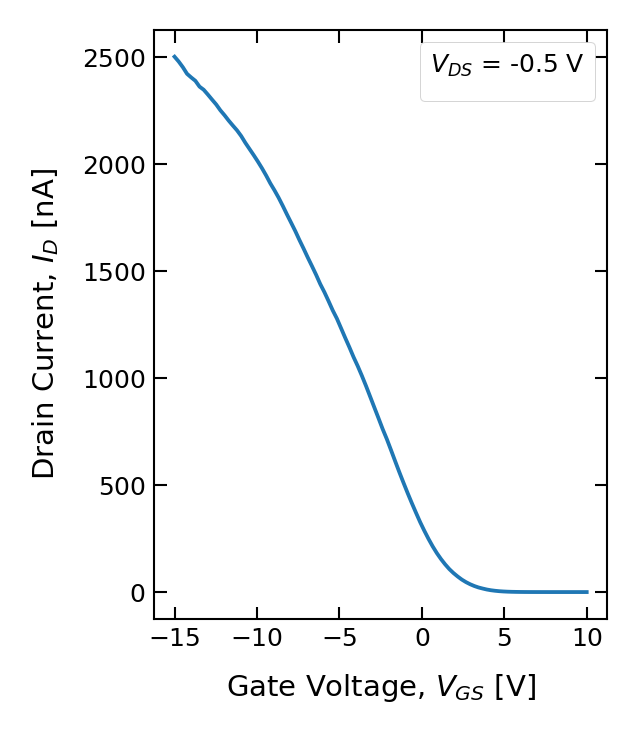

In [81]:
devHist = dlu.loadSpecificDeviceHistory('../../AutexysData/cesar/PrintedCNTs1/JP1/A/17-18', 'GateSweep.json', minExperiment=13, maxExperiment=13)

Id = np.array(devHist[1]['Results']['id_data'])[1]
vgss = np.array(devHist[1]['Results']['vgs_data'])[1]
Id *= -1e9

vds = np.round(np.median(devHist[1]['Results']['vds_data']), 3)

fig = plt.figure()
fig.set_figwidth(3*0.65)

plt.plot(vgss, Id)
plt.xlabel('Gate Voltage, $V_{{GS}}$ [V]')
plt.ylabel('Drain Current, $I_D$ [nA]')
plt.legend([], [], title=f"$V_{{DS}}$ = {vds} V")
plt.show()

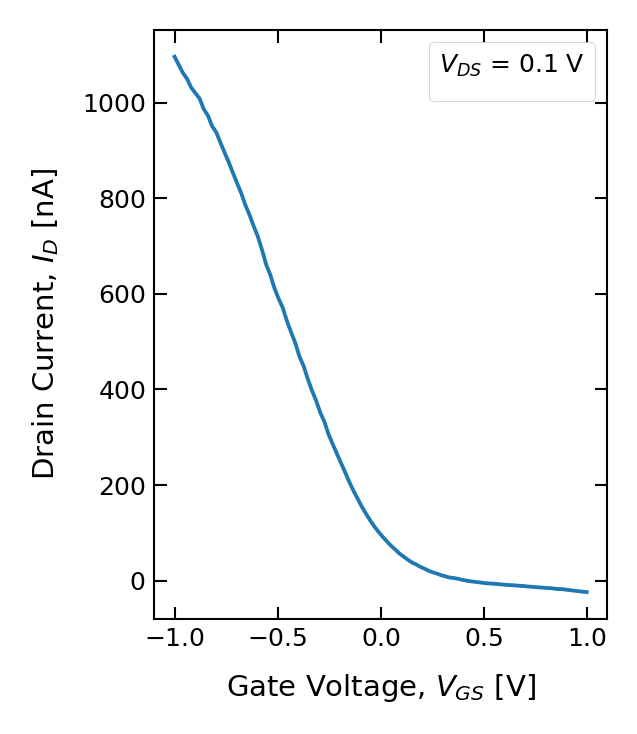

In [77]:
devHist = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148Prelim/C148/G/17-18', 'GateSweep.json', minExperiment=21, maxExperiment=21)

Id = np.array(devHist[1]['Results']['id_data'])[0]
vgss = np.array(devHist[1]['Results']['vgs_data'])[0]
Id *= 1e9

vds = np.round(np.median(devHist[1]['Results']['vds_data']), 3)

fig = plt.figure()
fig.set_figwidth(3*0.65)

plt.plot(vgss, Id)
plt.xlabel('Gate Voltage, $V_{{GS}}$ [V]')
plt.ylabel('Drain Current, $I_D$ [nA]')
plt.legend([], [], title=f"$V_{{DS}}$ = {vds} V")
plt.show()

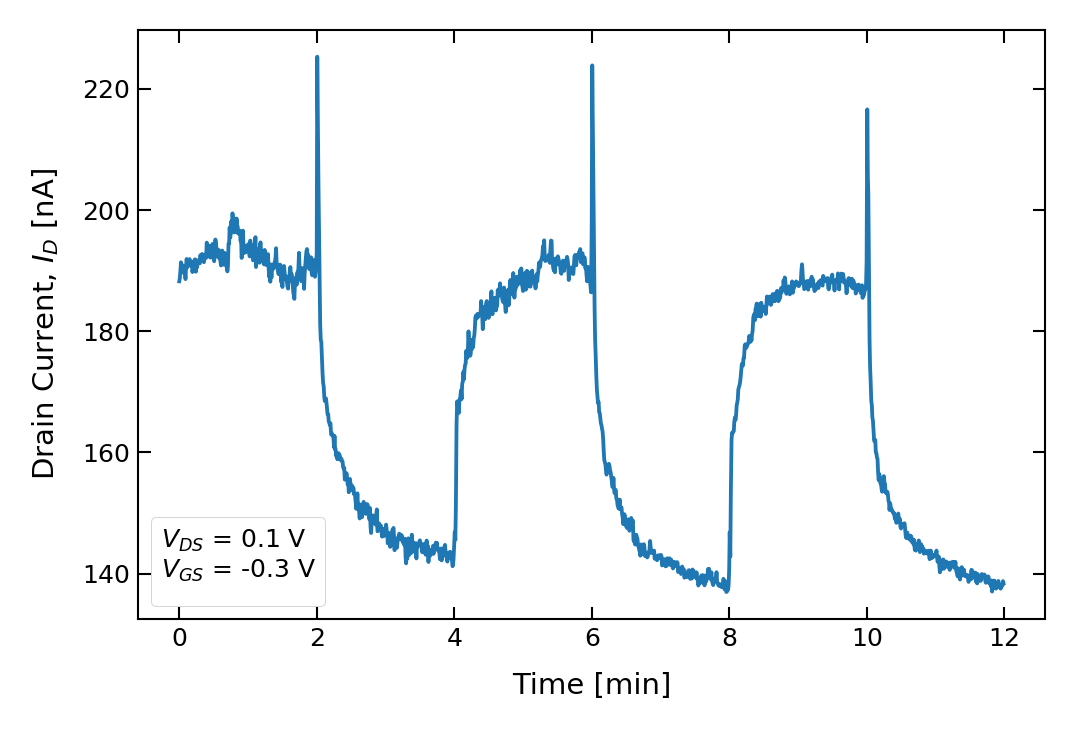

In [56]:
devHist = dlu.loadSpecificDeviceHistory('../../AutexysData/nathan/C148Prelim/C148/G/17-18', 'FlowStaticBias.json', minExperiment=21, maxExperiment=21)

Id = np.array(devHist[13]['Results']['id_data'])
ts = np.array(devHist[13]['Results']['timestamps'])
ts -= np.min(ts)
ts /= 60
Id *= 1e9

vds = np.round(np.median(devHist[13]['Results']['vds_data']), 3)
vgs = np.round(np.median(devHist[13]['Results']['vgs_data']), 3)

plt.plot(ts, Id)
plt.xlabel('Time [min]')
plt.ylabel('Drain Current, $I_D$ [nA]')
plt.legend([], [], title=f"$V_{{DS}}$ = {vds} V\n$V_{{GS}}$ = {vgs} V")
plt.show()

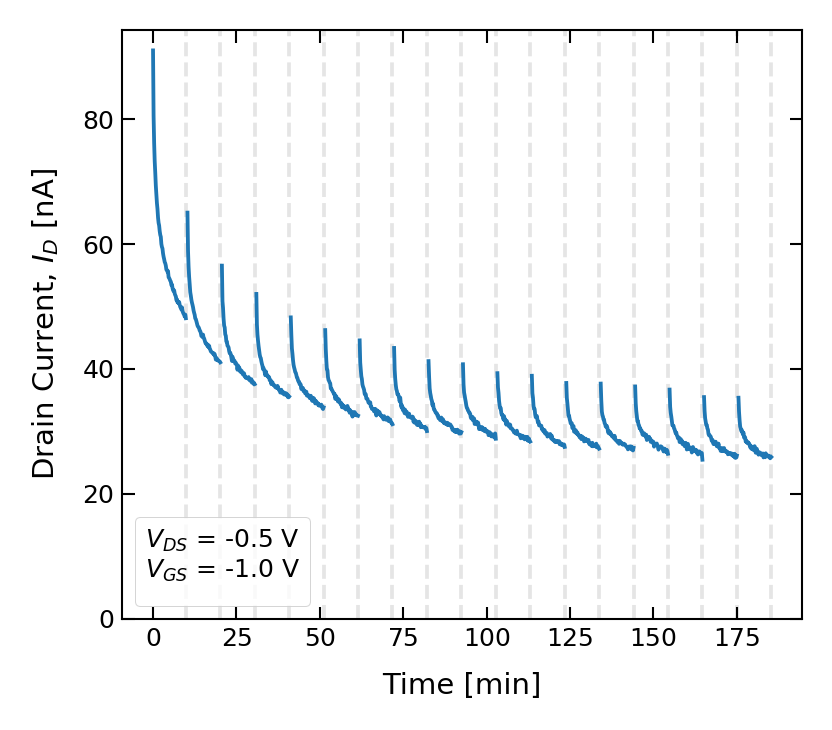

In [95]:
devHist = dlu.loadSpecificDeviceHistory('../../AutexysData/steven/TFTs1/C144/W/2-3', 'StaticBias.json', minExperiment=25, maxExperiment=25)

fig = plt.figure(figsize=(4.5*0.65, 4*0.65))

tmin = None

for d in devHist:
    Id = np.array(d['Results']['id_data'])
    ts = np.array(d['Results']['timestamps'])
    if tmin is None:
        tmin = np.min(ts)
    ts -= tmin
    ts /= 60
    Id *= -1e9
    
    vds = np.round(np.median(d['Results']['vds_data']), 1)
    vgs = np.round(np.median(d['Results']['vgs_data']), 1)
    
    plt.axvline(x=np.max(ts), color='k', alpha=0.1, linestyle='--')
    plt.plot(ts, Id, 'C0')

plt.xlabel('Time [min]')
plt.ylabel('Drain Current, $I_D$ [nA]')
plt.legend([], [], title=f"$V_{{DS}}$ = {vds} V\n$V_{{GS}}$ = {vgs} V")
plt.ylim(ymin=0)
plt.show()

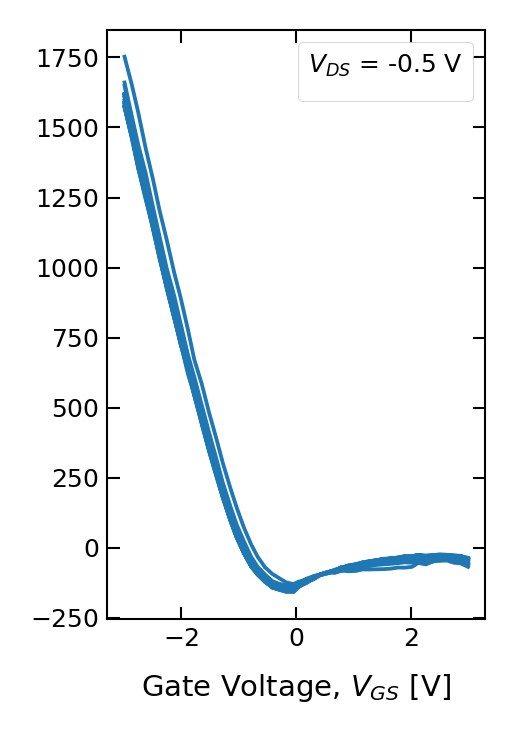

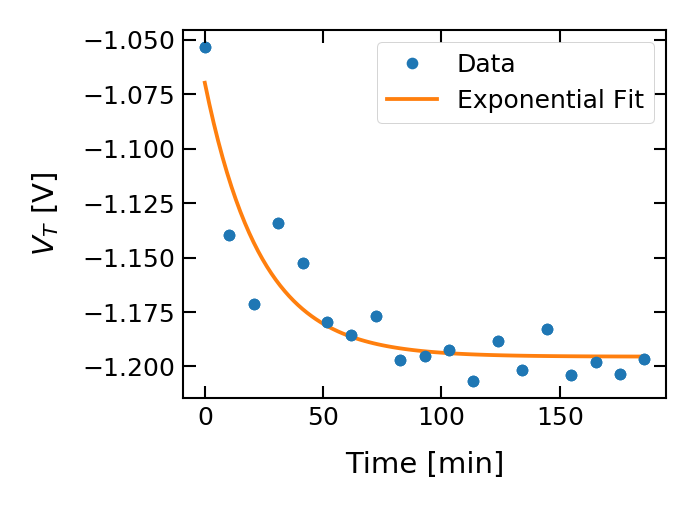

[[Model]]
    (Model(exponential) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 70
    # data points      = 19
    # variables        = 3
    chi-square         = 0.00369803
    reduced chi-square = 2.3113e-04
    Akaike info crit   = -156.343501
    Bayesian info crit = -153.510184
[[Variables]]
    decay:      23.6146266 +/- 5.45995719 (23.12%) (init = 1)
    amplitude:  0.12573166 +/- 0.01411041 (11.22%) (init = 1)
    c:         -1.19549419 +/- 0.00486851 (0.41%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(decay, c)         = -0.566
    C(decay, amplitude) = -0.323
    C(amplitude, c)     = -0.203



In [154]:
devHist = dlu.loadSpecificDeviceHistory('../../AutexysData/steven/TFTs1/C144/W/2-3', 'GateSweep.json', minExperiment=25, maxExperiment=25)

fig = plt.figure(figsize=(2.5*0.65, 4*0.65))

tmin = None

for d in devHist:
    Id = np.array(d['Results']['id_data'])[0]
    ts = np.array(d['Results']['timestamps'])
    vgss = np.array(d['Results']['vgs_data'])[0]
    if tmin is None:
        tmin = np.min(ts)
    ts -= tmin
    ts /= 60
    Id *= -1e9
    
    vds = np.round(np.median(d['Results']['vds_data']), 1)
    vgs = np.round(np.median(d['Results']['vgs_data']), 1)
    
    plt.plot(vgss, Id, 'C0')

plt.xlabel('Gate Voltage, $V_{{GS}}$ [V]')
# plt.ylabel('Drain Current, $I_D$ [nA]')
plt.legend([], [], title=f"$V_{{DS}}$ = {vds} V")
# plt.ylim(ymin=0)
plt.show()


fig = plt.figure(figsize=(3.2*0.65, 2.5*0.65))
VTs = []
allTs = []

for d in devHist:
    Id = np.array(d['Results']['id_data'])[0]
    ts = np.array(d['Results']['timestamps'])
    vgss = np.array(d['Results']['vgs_data'])[0]
    if tmin is None:
        tmin = np.min(ts)
    ts -= tmin
    ts /= 60
    Id *= -1
    
    vds = np.round(np.median(d['Results']['vds_data']), 1)
    vgs = np.round(np.median(d['Results']['vgs_data']), 1)
    
    bias_metrics = fet_model.FET_Metrics(vgss, Id)
    VT = bias_metrics['V_T']
    
    VTs.append(VT)
    allTs.append(ts.flatten()[0])

model = lmfit.models.ExponentialModel() + lmfit.models.ConstantModel()
fit = model.fit(VTs, x=allTs)

allTsSmooth = np.linspace(np.min(allTs), np.max(allTs), 100)

plt.plot(np.array(allTs), VTs, '.', label='Data')
plt.plot(allTsSmooth, fit.eval(x=allTsSmooth), label='Exponential Fit')
plt.plot(np.array(allTs), VTs, 'C0.')
plt.xlabel('Time [min]')
plt.ylabel('$V_T$ [V]')
plt.legend()
plt.show()

print(fit.fit_report())

## Theoretical Dynamic Response Curve

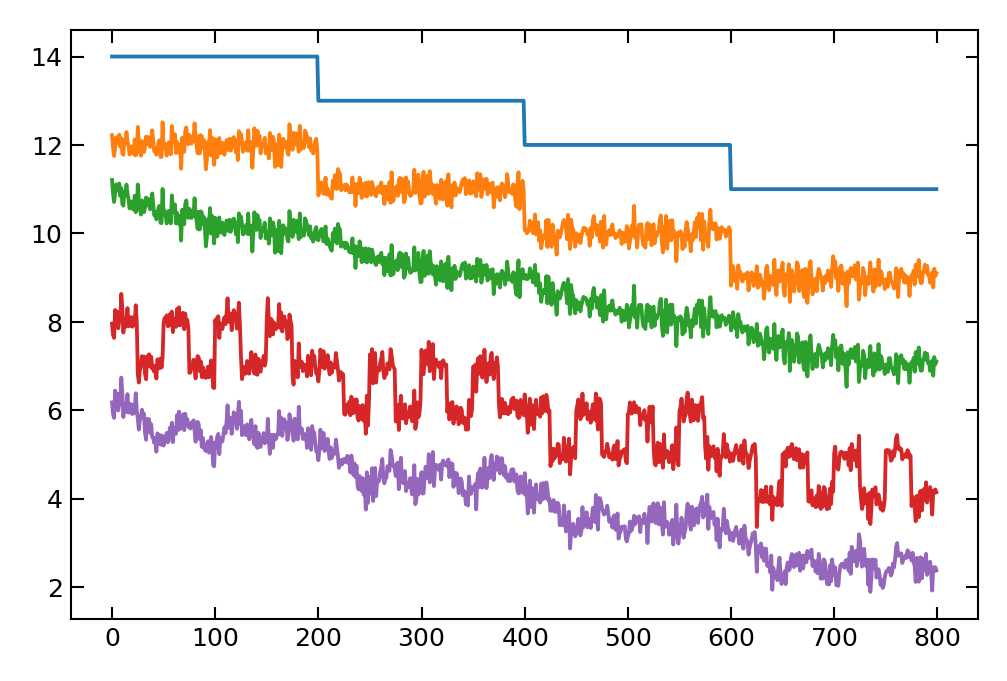

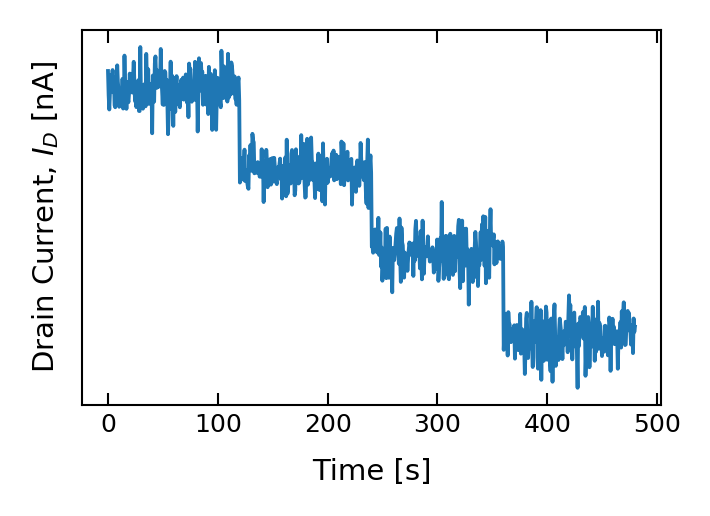

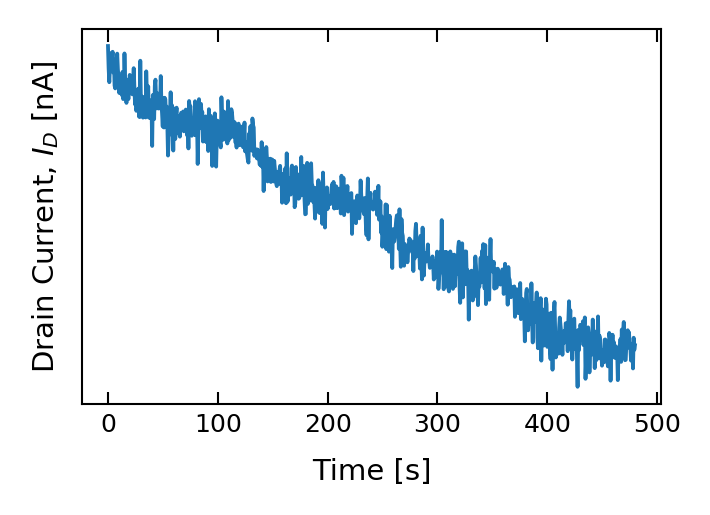

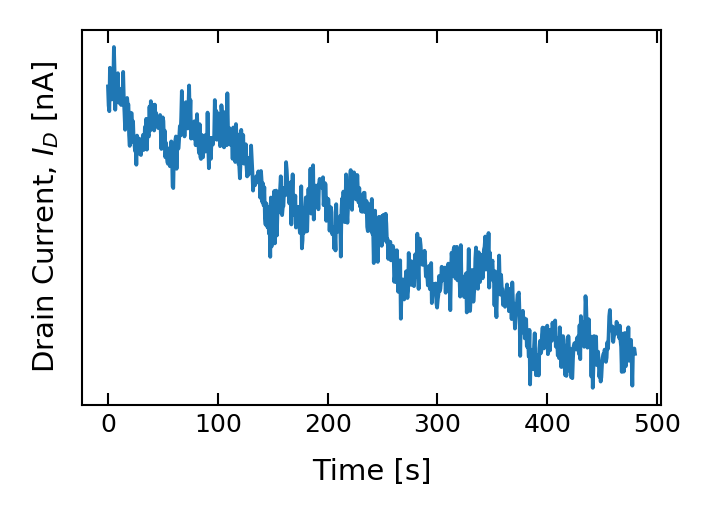

In [248]:
N = 1000

noise = 0.2*np.random.randn(N)
perfect = np.ceil(np.linspace(5, 1e-9/N, N))
ideal = perfect + noise

settleImpulseT = np.linspace(0,1,N//5)
settleImpulse = np.exp(-settleImpulseT/0.4)
settleImpulse /= np.sum(settleImpulse)
settleBase = np.convolve(perfect, settleImpulse)
settleBase = settleBase[0:-N//5 + 1]

settle = settleBase + noise

perfect = perfect[N//5:]
ideal = ideal[N//5:]
settleBase = settleBase[N//5:]
settle = settle[N//5:]



NAlt = 4*N
noiseAlt = 0.2*np.random.randn(NAlt)
perfectStepAlt = np.ceil(np.linspace(5, 1e-9/NAlt, NAlt))
perfectOnlyAlt = 1 - np.ceil(np.sin(np.linspace(0 + 1e-9, 2*np.pi*4*5, NAlt)))
perfectAlt = perfectStepAlt - perfectOnlyAlt
idealAlt = perfectAlt + noiseAlt

settleBaseAlt = np.convolve(perfectAlt, settleImpulse)
settleBaseAlt = settleBaseAlt[0:-N//5 + 1]

settleAlt = settleBaseAlt + noiseAlt

perfectOnlyAlt = perfectOnlyAlt[NAlt//5:]
perfectStepAlt = perfectStepAlt[NAlt//5:]
perfectAlt = perfectAlt[NAlt//5:]
idealAlt = idealAlt[NAlt//5:]
settleBaseAlt = settleBaseAlt[NAlt//5:]
settleAlt = settleAlt[NAlt//5:]

plt.plot(perfect+10)
plt.plot(ideal+8)
plt.plot(settle+6)
plt.plot(idealAlt[::4]+4)
plt.plot(settleAlt[::4]+2)
plt.show()


for signal in [ideal, settle, settleAlt[::4]]:
    plt.figure(figsize=(0.65*3.8, 0.65*2.8))
    
    ts = np.linspace(0, 4*12*10, len(signal))
    plt.plot(ts, 3*(signal+5))
    plt.xlabel('Time [s]')
    plt.ylabel('Drain Current, $I_D$ [nA]')
    plt.yticks([])
    plt.tight_layout()
    plt.show()
